In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')

# We'll use only the first 3000 documents
n_samples = 3000

X = news.data[:n_samples]
y = news.target[:n_samples]

In [3]:
X[:2]

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Read in the list of stop words
def get_stop_words():
    result = set()
    for line in open('stopwords_en.txt', 'r').readlines():
        result.add(line.strip())
    return result

stop_words = get_stop_words()

In [8]:
# TfidfVectorizer performs tokenization, removes stop words, and performs tfxidf transformation

tfidf = TfidfVectorizer(stop_words=stop_words, token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")

In [9]:
X_tfidf = tfidf.fit_transform(X)

In [10]:
X_tfidf.shape

(3000, 57114)

In [11]:
# Note that the transformed data is stored in a sparse matrix (which is much more efficient for large data sets)

X_tfidf

<3000x57114 sparse matrix of type '<class 'numpy.float64'>'
	with 300362 stored elements in Compressed Sparse Row format>

In [12]:
print (X_tfidf[:2])

  (0, 44234)	0.07784251810552512
  (0, 21611)	0.0629754665731824
  (0, 20275)	0.07207470799486403
  (0, 30806)	0.07961348214837946
  (0, 27118)	0.10327444462678373
  (0, 16305)	0.10825085554689588
  (0, 27622)	0.09557861594319107
  (0, 41009)	0.12357807243428796
  (0, 7894)	0.08349613667811626
  (0, 21619)	0.06893886833383445
  (0, 13708)	0.0643253811617751
  (0, 30057)	0.050363214736829996
  (0, 9127)	0.11033752313939182
  (0, 39461)	0.08610665648030909
  (0, 54423)	0.07286610718541295
  (0, 21342)	0.15740585182511238
  (0, 30820)	0.11139663807787663
  (0, 48128)	0.08708364923250081
  (0, 45314)	0.15800117627069288
  (0, 42622)	0.15624817916580655
  (0, 8239)	0.050363214736829996
  (0, 46175)	0.08610665648030909
  (0, 28203)	0.03330802363893816
  (0, 27387)	0.23119101107376427
  (0, 50444)	0.057717484175692085
  :	:
  (1, 52871)	0.04345155095190125
  (1, 36145)	0.09066250993733786
  (1, 36913)	0.09240841103059219
  (1, 52504)	0.029118571337176352
  (1, 35362)	0.06438028530743534
  (1,

In [13]:
# It's possible (though not usually necessary) to convert the matrix into a "dense" matrix

newX = X_tfidf.todense()

In [14]:
newX.shape

(3000, 57114)

In [15]:
np.set_printoptions(linewidth=120, edgeitems=12)
print (newX[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
newX.sum(axis=1)

matrix([[ 6.38255787],
        [ 6.22316442],
        [11.10466984],
        [ 8.01377232],
        [ 6.59598284],
        [ 8.64254062],
        [ 4.08752316],
        [ 8.23253906],
        [ 6.9290635 ],
        [ 5.54138631],
        [ 6.36652435],
        [ 5.6413991 ],
        ...,
        [ 9.56666541],
        [11.19261544],
        [ 4.75115972],
        [ 6.31888744],
        [ 7.1462622 ],
        [ 6.72387298],
        [ 6.76975027],
        [ 7.00729698],
        [ 5.90752046],
        [ 9.89775822],
        [ 6.17808897],
        [ 7.46697255]])

In [18]:
# Fortunately, scikit-learn modules handle sparse matrices natively

# Let's create a pipeline to perform preprocessing and to build the model
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('nb', MultinomialNB(alpha=0.01)),
])

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator of k=5 folds
    #cv = KFold(len(y), K, shuffle=True, random_state=0)
    cv = KFold(n_splits=K,random_state=None, shuffle=False)
    cv.split(X)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    avg_score = np.mean(scores)
    error = sem(scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))

In [38]:
evaluate_cross_validation(clf, X, y, 3)

[0.824 0.809 0.82 ]
Mean score: 0.818 (+/-0.004)


In [40]:
def calc_params(X, y, clf, param_values, param_name, K):
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(n_samples, K, shuffle=True, random_state=0)
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        #cv.split(X)
        
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, alpha=0.4, lw=2, c='g')
    
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [41]:
alphas = np.logspace(-7, 0, 8)
print (alphas)

[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


nb__alpha  =  1e-07
nb__alpha  =  1e-06
nb__alpha  =  1e-05
nb__alpha  =  0.0001
nb__alpha  =  0.001
nb__alpha  =  0.01
nb__alpha  =  0.1
nb__alpha  =  1.0


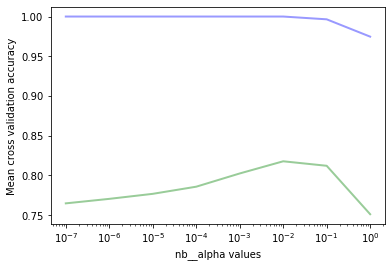

In [42]:
train_scores, test_scores = calc_params(X, y, clf, alphas, 'nb__alpha', 3)

In [43]:
print ('training scores: ', train_scores)
print ('testing scores: ', test_scores)

training scores:  [1.         1.         1.         1.         1.         1.         0.9965     0.97466667]
testing scores:  [0.76466667 0.77033333 0.77666667 0.78566667 0.80233333 0.81766667 0.812      0.751     ]


#### Let's try Support Vector Machines for classification

In [44]:
from sklearn.svm import SVC

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC()),
])

svc__gamma  =  0.01
svc__gamma  =  0.1
svc__gamma  =  1.0
svc__gamma  =  10.0


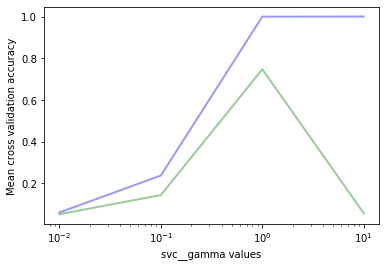

In [45]:
gammas = np.logspace(-2, 1, 4)

train_scores, test_scores = calc_params(X, y, clf, gammas, 'svc__gamma', 3)

In [46]:
print ('training scores: ', train_scores)
print ('testing scores: ', test_scores)

training scores:  [0.06066667 0.23783333 0.9995     1.        ]
testing scores:  [0.05233333 0.144      0.74733333 0.05666667]


For gamma < 1 we have underfitting. For gamma > 1 we have overfitting. So here, the best result is for gamma = 1 where we obtain a training an accuracy of 0.999 and a testing accuracy of 0.75

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'svc__gamma': np.logspace(-2, 1, 4),
    'svc__C': np.logspace(-1, 1, 3),
}

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC()),
])

gs = GridSearchCV(clf, parameters, verbose=2, cv=3)

In [50]:
%time _ = gs.fit(X, y)

gs.best_params_, gs.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] svc__C=0.1, svc__gamma=0.01 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   7.5s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   7.0s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................
[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   7.0s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   7.0s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   7.0s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   7.1s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=1.0, total=   7.1s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=1.0, total=   7.1s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.3min finished


CPU times: user 4min 25s, sys: 47.4 ms, total: 4min 25s
Wall time: 4min 28s


({'svc__C': 10.0, 'svc__gamma': 0.1}, 0.8266666666666667)

With the grid search we obtained a better combination of C and gamma parameters, for values 10.0 and 0.10 respectively, we obtained a 3-fold cross validation accuracy of 0.828 much better than the best value we obtained (0.76) in the previous experiment by only adjusting gamma and keeeping C value at 1.0.